In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils.object_detection import non_max_suppression
import sys 
import time


In [39]:
HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

def lerVideo(caminho):
    cap = cv2.VideoCapture(caminho)
    frames = []

    if not cap.isOpened():
        raise("Erro abrindo o arquivo!")

    while True: 
        ret, frame = cap.read()

        if not ret:
            print("Último frame ou erro")
            break

        frames.append(frame)

        if cv2.waitKey(1) == ord('q'):
            break
        

    print("Leitura completa")
    cap.release()
    return np.array(frames)


def reproduzirVideo(frames):
    for frame in frames:
        cv2.imshow("Sem fundo", frame)
        
        if cv2.waitKey(1) == ord('q'):
            break

        time.sleep(1/30)

    cv2.destroyAllWindows()

def Detector(frame):
    rects, weights = HOGCV.detectMultiScale(frame, winStride=(4, 4), padding=(8, 8), scale=1.03)
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    c = 1
    for x, y, w, h in pick:
        cv2.rectangle(frame, (x, y), (w, h), (0, 200, 0), 2)
        c += 1

    #cv2.putText(frame, f'Total de Pessoas: {c-1}', (10, ), cv2.FONT_HERSHEY_COMPLEX, 0.8, (255, 255,255), 1)
    #cv2.imshow('output', frame)
    return frame, c


In [59]:

frames = lerVideo('pegadinha.mp4')
frames.shape


Último frame ou erro
Leitura completa


(679, 480, 264, 3)

In [41]:
frames.shape

(450, 476, 320, 3)

In [60]:
frames_processado = []
for i, frame in enumerate(frames):
    framecorrente, c = Detector(frame)
    frames_processado.append(framecorrente)

frames_processado = np.array(frames_processado)

#reproduzirVideo(frames_processado)

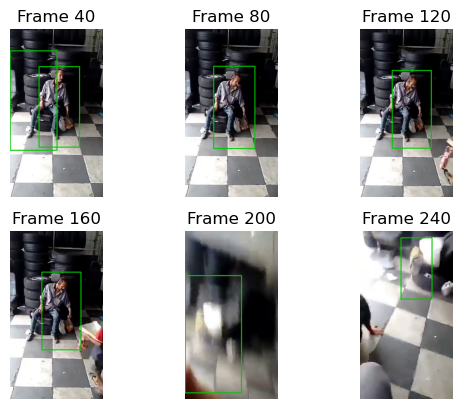

In [89]:


for i in [1, 2, 3, 4, 5, 6]:
    if i == 5:
        img = cv2.cvtColor(frames_processado[490], cv2.COLOR_BGR2RGB)
        plt.subplot(2, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Frame {40*i}")
        continue 

    if i == 6:
        img = cv2.cvtColor(frames_processado[499], cv2.COLOR_BGR2RGB)
        plt.subplot(2, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Frame {40*i}")
        continue 

    img = cv2.cvtColor(frames[160+10*i], cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Frame {40*i}")

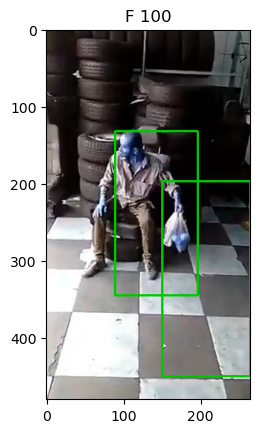

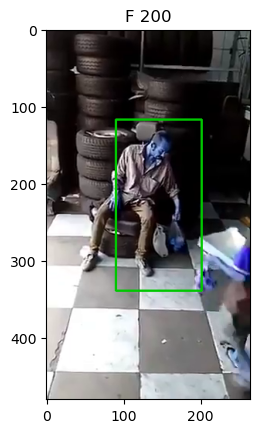

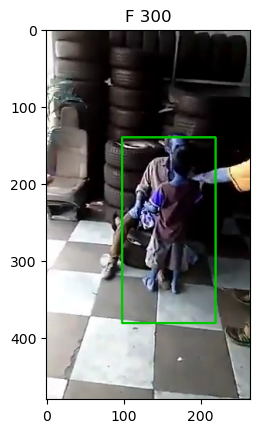

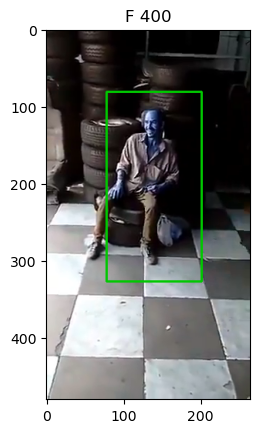

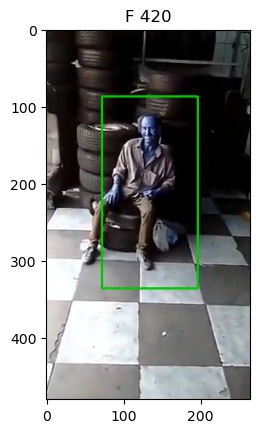

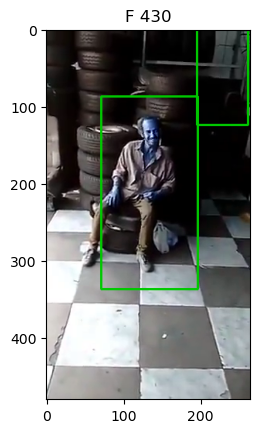

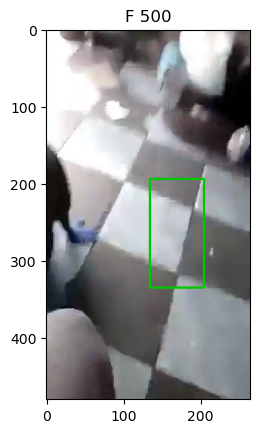

In [83]:
for i in [100, 200, 300, 400, 420, 430, 500]:
    plt.imshow(frames[i])
    plt.title(f"F {i}")
    plt.show()